# Clase IV curso 2020-2021. Emanuele Schiavi
4.1 Descomposicion SVD  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
from sympy.matrices.expressions.factorizations import svd

from IPython.display import Math, display, Latex


In [2]:
A = np.array([[1, 1],
              [1, 0],
              [0, 1]])
display(Matrix(A))

# calculo matrices simetricas asociadas
ATA = np.matmul(A.transpose(), A)
AAT = np.matmul(A, A.transpose())

display(Latex('$A^t A$'))
display(Matrix(ATA))
display(Latex('$AA^t$'))
display(Matrix(AAT))

# calculo descomposicion SVD
U, S, V = np.linalg.svd(A)

# almaceno los valores singulares
D = S
print('D')
display(Matrix(D))

# # calculo autovalores y autovectores de las matrices simetricas
D1, V1 = np.linalg.eig(ATA)
print('D1')
display(Matrix(D1))
print('V1')
display(Matrix(V1))

D2, U1 = np.linalg.eig(AAT)
print('D2')
display(Matrix(D2))
print('U1')
display(Matrix(U1))

# descomposicion
u1=U[:,0]
print('u1')
display(Matrix(u1))

u2=U[:,1]
print('u2')
display(Matrix(u2))

v1=V[:,0]
print('v1')
display(Matrix(v1))

v2=V[:,1]
print('v2')
display(Matrix(v2))

Matrix([
[1, 1],
[1, 0],
[0, 1]])

<IPython.core.display.Latex object>

Matrix([
[2, 1],
[1, 2]])

<IPython.core.display.Latex object>

Matrix([
[2, 1, 1],
[1, 1, 0],
[1, 0, 1]])

D


Matrix([
[1.73205080756888],
[             1.0]])

D1


Matrix([
[3.0],
[1.0]])

V1


Matrix([
[0.707106781186547, -0.707106781186547],
[0.707106781186547,  0.707106781186547]])

D2


Matrix([
[                  3.0],
[-2.91433543964104e-16],
[                  1.0]])

U1


Matrix([
[-0.816496580927726, -0.577350269189626, -1.57009245868377e-16],
[-0.408248290463863,  0.577350269189626,    -0.707106781186547],
[-0.408248290463863,  0.577350269189626,     0.707106781186548]])

u1


Matrix([
[-0.816496580927726],
[-0.408248290463863],
[-0.408248290463863]])

u2


Matrix([
[1.85577520665993e-16],
[  -0.707106781186547],
[   0.707106781186548]])

v1


Matrix([
[-0.707106781186548],
[-0.707106781186547]])

v2


Matrix([
[-0.707106781186547],
[ 0.707106781186548]])

Descomposición


In [3]:
u1 = Matrix(u1)
u2 = Matrix(u2)
v1 = Matrix(v1)
v2 = Matrix(v2)

A_mod1 = D[0]*u1*v1.transpose() # primer modo
A_mod2 = D[1]*u2*v2.transpose() # segundo modo
A_rec = A_mod1+A_mod2 # reconstruccion
display(Matrix(A_rec))
norma2 = np.linalg.norm(A, ord=2) # coincide con el valor singular maximo
display(norma2)

Matrix([
[                 1.0,     0.999999999999999],
[                 1.0, -1.66533453693773e-16],
[1.11022302462516e-16,                   1.0]])

1.732050807568877

In [4]:
n=3
A = np.random.rand(n,n)
D, _ = np.linalg.eig(A)
print('Autovalores')
display(Matrix(D))
U, S, V = np.linalg.svd(A)
print('U')
display(Matrix(U))
print('S')
display(Matrix(np.diag(S)))
print('V')
display(Matrix(V))

radio=max(abs(D))
print('Ratio')
display(radio)

Autovalores


Matrix([
[  1.32961976680594],
[0.0312345712957208],
[-0.466843040263353]])

U


Matrix([
[0.510166185937092,  0.417991296148399,     0.751673957956894],
[0.634000401803486, -0.773332671141195, -0.000265063468471549],
[0.581183235511331,  0.476696817788628,    -0.659534829005092]])

S


Matrix([
[1.3843737520529,               0.0,                0.0],
[            0.0, 0.547241078983038,                0.0],
[            0.0,               0.0, 0.0255918601718912]])

V


Matrix([
[  0.276958175122658,  0.860618683089843,  0.427351905985492],
[0.00176755574759755,  0.444292573040608, -0.895880006076503],
[  0.960880348940182, -0.248876659929495, -0.121529268750092]])

Ratio


1.3296197668059355

Ejercicio 4.1 U diagonaliza A*A'. Lo aplicamos a imagenes

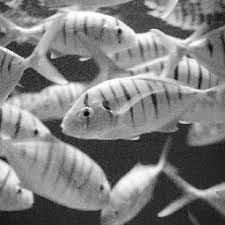

Espectro


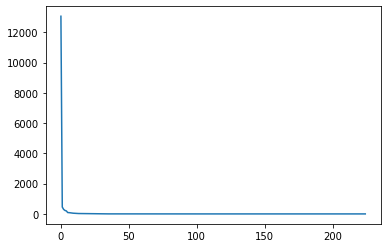

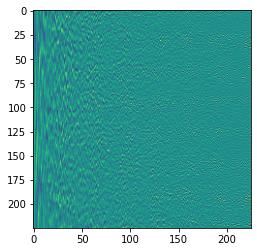

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

f = Image.open('./Images/jurel-dorado.jpg').convert('L') # convertimos a escala de grises
display(f)
A = np.asarray(f)/255.0

B = np.matmul(A.transpose(),A)
print('Espectro')
D, V = np.linalg.eig(B)
plt.plot(D)
plt.show()
plt.imshow(V)
plt.show()

Descomposicion SVD

In [6]:
U, S, V = np.linalg.svd(A)
display(Latex('$R = V \Sigma - AV^{t}$'))
R = np.matmul(U,np.diag(S)) - np.matmul(A,V.transpose())


norma_rec = np.linalg.norm(R, ord=2)
print('Norma de la reconstrucción: ')
display(norma_rec)

<IPython.core.display.Latex object>

Norma de la reconstrucción: 


3.0647878145864927e-13

U diagonaliza $AA^{t}$

In [7]:
r = np.matmul(A, A.transpose()) - np.matmul(np.matmul(np.matmul(U, np.diag(S)), np.diag(S).transpose()),U.transpose())
norm = np.linalg.norm(r, ord='fro')
print('Norma de la reconstrucción: ')
display(norm)

Norma de la reconstrucción: 


1.7704355746830063e-11

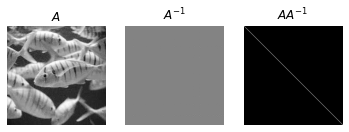

In [8]:
Ap = np.linalg.pinv(A)

fig, axs = plt.subplots(1,3)
axs[0].imshow(A, cmap='gray')
axs[0].axis('off')
axs[0].set_title('$A$')
axs[1].imshow(Ap, cmap='gray')
axs[1].axis('off')
axs[1].set_title('$A^{-1}$')
axs[2].imshow(np.matmul(Ap,A), cmap='gray')
axs[2].set_title('$AA^{-1}$')
axs[2].axis('off')
plt.show()


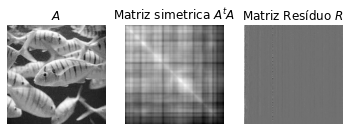

In [9]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(A, cmap='gray')
axs[0].axis('off')
axs[0].set_title('$A$')
axs[1].imshow(B, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Matriz simetrica $A^t A$')
axs[2].imshow(R, cmap='gray')
axs[2].set_title('Matriz Resíduo $R$')
axs[2].axis('off')

plt.show()

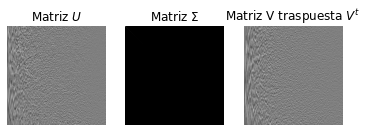

In [10]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(U, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Matriz $U$')
axs[1].imshow(np.diag(S), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Matriz $\Sigma$')
axs[2].imshow(V.transpose(), cmap='gray')
axs[2].set_title('Matriz V traspuesta $V^{t}$')
axs[2].axis('off')

plt.show()

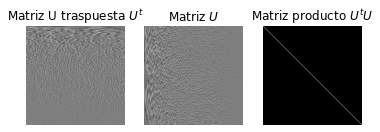

In [11]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(U.transpose(), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Matriz U traspuesta $U^{t}$')
axs[1].imshow(U, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Matriz $U$')
axs[2].imshow(np.matmul(U.transpose(), U), cmap='gray')
axs[2].set_title('Matriz producto $U^{t}U$')
axs[2].axis('off')

plt.show()

4.2 Pseudo inversa
Propiedades: 
* A=A*pinv(A)*A', 
* pinv(A)=pinv(A)*A*pinv(A), 
* (A*pinv(A))'-A*pinv(A)
* (pinv(A)*A)'-pinv(A)*A

Ejemplo rango max


In [15]:
A = np.array([[1, 1], [1 ,2]], np.float32)
A = Matrix(A)
m, n = A.shape

rango = A.rank()
A_p = A.pinv()
A_pi = A_p*A # es la inversa izq
A_pd = A*A_p # es la inversa derecha

f1 = (A.transpose()*A).inv()*A.transpose() # vale para rank=n
f2 = A.transpose()*(A*A.transpose()).inv() # vale para rank=m
epsilon = symbols('$\epsilon$')

A_r = A.transpose()*A + epsilon*np.eye(n)
A_s = A*A.transpose() + epsilon*np.eye(n)
display(A_r)
display(A_s)


# Ainv_r = np.linalg.inv(A_r)
# Ainv_s = np.linalg.inv(A_s)
# L1=limit(Ainv_r*A',0)
# L1=limit(A'*Ainv_s,0)

Matrix([
[1.0*$\epsilon$ + 2.0,                  3.0],
[                 3.0, 1.0*$\epsilon$ + 5.0]])

Matrix([
[1.0*$\epsilon$ + 2.0,                  3.0],
[                 3.0, 1.0*$\epsilon$ + 5.0]])